In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from math import sqrt, e, sin, cos, pi, inf
from scipy.optimize import fsolve
from utils import remove_close

Используя уравнение Шредингера, найти связные состояния и соответствующие им собственные значения в случае прямоугольной потенциальной ямы:

$
V(x) = \begin{cases}
   -U,  |x| < a \\
   0, |x| > a
\end{cases}
$

In [14]:
h = 1.054571817e-34

m = 9.109e-31
U0 = 1
a = 2.6e-19

Находим k из уравнений $ cos(ka) = \pm{\frac{ka}{\sqrt{\frac{2mU_0a^2}{\hbar^2}}}}, sin(ka) = \pm{\frac{ka}{\sqrt{\frac{2mU_0a^2}{\hbar^2}}}} $


Уравнения можно переписать как $ \pm{cos(x)} = \frac{x}{C}, \pm{sin(x)} = \frac{x}{C} $

In [15]:
steps = 10000

C = (a/h) * sqrt(2*m*U0)
print(f'C = {round(C, 2)}')
line = lambda x: x/C
f1 = lambda x: cos(x)
f2 = lambda x: -cos(x)
f3 = lambda x: sin(x)
f4 = lambda x: -sin(x)

C = 3.33


In [16]:
roots_cos = []
roots_sin = []

def find_root_in_segment():
    min_dif = inf
    root = None
    for x in np.linspace(x_start, x_end, steps):
        dif = abs(f(x) - line(x))
        if dif < min_dif and dif < 1e-3:
            min_dif = dif
            root = x

    if root is not None:
        if fn <= 1:
            roots_cos.append(root)
        else:
            roots_sin.append(root)

for fn, f in enumerate([f1, f2, f3, f4]):
    x_start = 0
    x_end = x_start + pi/2
    while line(x_start) < 1:
        find_root_in_segment()
        x_start = x_end
        x_end = x_start + pi/2

    x_start = x_start - pi/2
    x_end = 0
    while line(x_start) > -1:
        find_root_in_segment()
        x_end = x_start
        x_start = x_end - pi/2
        
roots_cos = [round(x, 2) for x in roots_cos]
roots_sin = [round(x, 2) for x in roots_sin]
roots_cos = remove_close(roots_cos, 2e-2)
roots_sin = remove_close(roots_sin, 2e-2)

roots = roots_cos + roots_sin
roots = list(set(roots))
print(f'roots: {sorted(roots)}')

roots: [-2.36, -1.2, 0.0, 1.2, 2.36, 3.29]


Находим собственные значения

Es: [-0.8699628567507377, -0.4970452270547977, -0.02254510955254141]


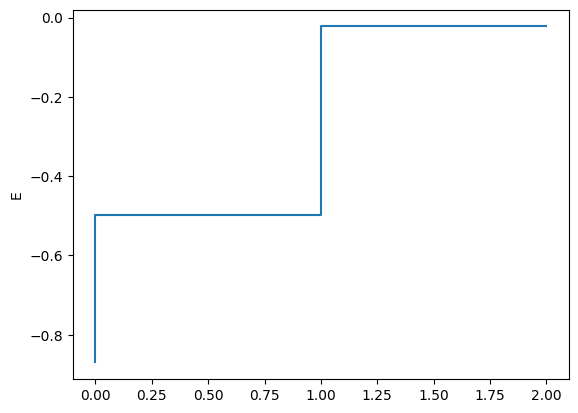

In [17]:
ks_cos = np.array(roots_cos) / a
ks_sin = np.array(roots_sin) / a
ks = ks_cos # ks_sin не используются т.к. они дают нулевой результат
E = lambda k: (h**2)*(k**2)/(2*m) - U0
Es = [E(k) for k in ks]
Es = sorted(list(set(Es)))
print(f'Es: {Es}')

plt.plot(Es, drawstyle='steps-pre')
plt.ylabel("E")
plt.show()

Графики $\psi$ функций

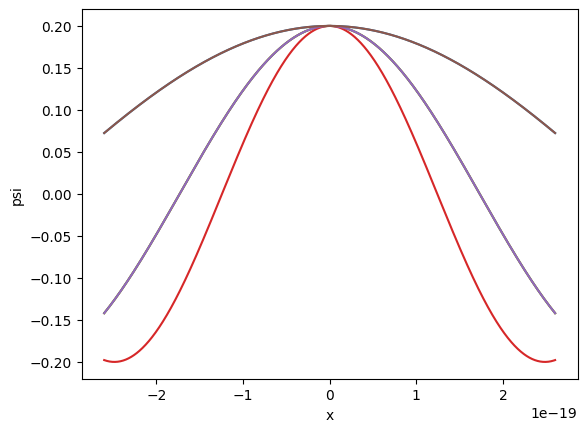

In [18]:
psi = lambda B1, B2, k, x: B1*e**(1j*k*x) + B2*e**(-1j*k*x)

xs = np.linspace(-a, a, 1000)

for k in ks:
    ys = psi(0.1, 0.1, k, xs)
    plt.plot(xs, ys)
    
plt.ylabel("psi")
plt.xlabel("x")
plt.show()